<a href="https://colab.research.google.com/github/raheelahmadguraya/Intelligent-Systems-4/blob/main/ELE888_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

from sklearn.utils import shuffle
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, InputLayer
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #Reading data from link
pd.set_option("display.max_rows", None, "display.max_columns", None)
np.set_printoptions(threshold=sys.maxsize)
pd.options.mode.chained_assignment = None  # default='warn'

**Preprocessing**

In [ ]:
#Preprocessing
c0 = data['famhist']
encoder = preprocessing.LabelEncoder()
c0 = encoder.fit_transform(c0.ravel())
data['famhist'] = c0

x0 = data['row.names']
x0 = x0/x0
data['row.names'] = x0

features = data.drop(['chd'],axis=1)
target = data['chd']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5, shuffle=True)

scaler = StandardScaler()

for i in range(1,10):
  scaler.fit(x_train.iloc[:, i].values.reshape(-1, 1))
  x_train.iloc[:, i] = scaler.transform(x_train.iloc[:, i].values.reshape(-1, 1))
  x_test.iloc[:, i] = scaler.transform(x_test.iloc[:, i].values.reshape(-1, 1))



**Part A**

**K-Means Clustering**

Accuracy: 44.58874458874459 %


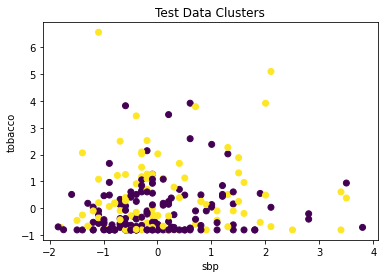

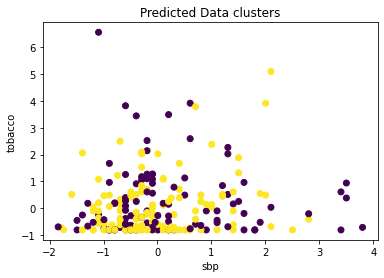

In [ ]:
#K-Means Clustering
modelk = KMeans(n_clusters=2)
modelk.fit(x_train)
y_kpred = modelk.predict(x_train)

labels = modelk.labels_
correct_labels = sum(y_test == labels)
print("Accuracy:", (correct_labels / y_test.size) * 100, "%")

plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_test)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Test Data Clusters")
plt.show()
plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_kpred)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Predicted Data clusters")
plt.show()

In [ ]:
def NNstruct(xtrain, y_train):

  model = Sequential(name="structure_1")
  model.add(Dense(units = xtrain.shape[1], activation = 'linear', input_shape=[10]))
  model.add(Dense(units=500, activation='relu'))
  model.add(Dense(units=500, activation='relu'))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dense(units=2, activation='softmax'))

  model.summary()

  model.compile(loss='binary_crossentropy', optimizer='adam')


  encoded = to_categorical(y_train)


  model.fit(x_train, encoded, epochs=35, batch_size = 12)

  return model

Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               64128     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 258       
Total params: 320,496
Trainable params: 320,496
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
20/20 [==============================] - 1s 5ms/step - loss: 0.5646
Epoch 2/35
20/20 [==================

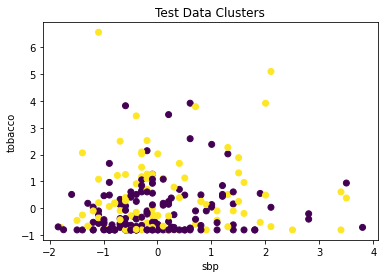

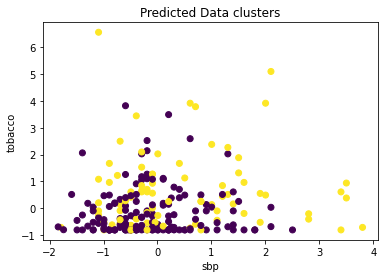

In [ ]:
modelNN = NNstruct(x_train, y_train)
y_predNN = modelNN.predict(x_test)
y_predNN_max = np.max(y_predNN, axis=1)

for i in range(len(y_predNN)):
  if y_predNN[i, 0] == y_predNN_max[i]:
    y_predNN_max[i] = 0
  elif y_predNN[i, 1] == y_predNN_max[i]:
    y_predNN_max[i] = 1

#print(y_predNN_max)

correct_labels = sum(y_test == y_predNN_max)
print("Accuracy:", (correct_labels / y_test.size) * 100, "%")

plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_test)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Test Data Clusters")
plt.show()
plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_predNN_max)
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Predicted Data clusters")
plt.show()

**Part B: PCA**

In [ ]:
#PCA
pca = PCA(n_components=10)
pca.fit(x_train)
variance = pca.explained_variance_ratio_

var=np.cumsum(pca.explained_variance_ratio_)
var

pca = PCA(.90)
pc90 = pca.fit(x_train)
pc90 = pca.transform(x_train)

Accuracy: 44.58874458874459 %


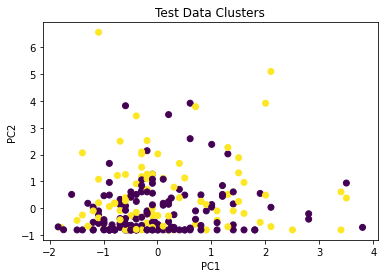

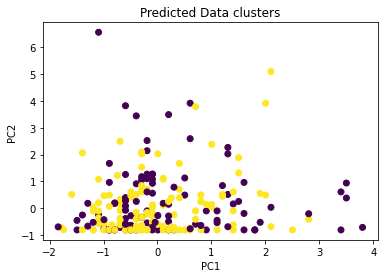

In [ ]:
#K-Means Clustering with PCs which explain 90% of variance
modelk = KMeans(n_clusters=2)
modelk.fit(pc90)
y_kpred90 = modelk.predict(pc90)

labels = modelk.labels_
correct_labels = sum(y_test == labels)
print("Accuracy:", (correct_labels / y_test.size) * 100, "%")

plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_test)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Test Data Clusters")
plt.show()
plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_kpred90)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Predicted Data clusters")
plt.show()

Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_26 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               64128     
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 258       
Total params: 318,963
Trainable params: 318,963
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
20/20 [==============================] - 1s 4ms/step - loss: 0.6333
Epoch 2/35
20/20 [==================

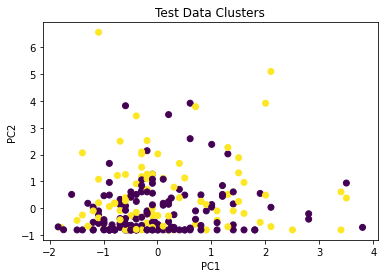

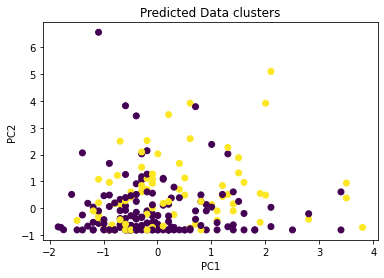

In [ ]:
modelNN = NNstruct(pc90, y_train)
y_predNN = modelNN.predict(x_test)
y_predNN_max = np.max(y_predNN, axis=1)

for i in range(len(y_predNN)):
  if y_predNN[i, 0] == y_predNN_max[i]:
    y_predNN_max[i] = 0
  elif y_predNN[i, 1] == y_predNN_max[i]:
    y_predNN_max[i] = 1

correct_labels = sum(y_test == y_predNN_max)
print("Accuracy:", (correct_labels / y_test.size) * 100, "%")

plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_test)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Test Data Clusters")
plt.show()
plt.scatter(x_test.iloc[:,1], x_test.iloc[:, 2], c = y_predNN_max)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Predicted Data clusters")
plt.show()